In [1]:
# Package imports# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

make: *** No targets specified and no makefile found.  Stop.


In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [8]:
# Get only the cubes that have our line of interest in them
mol_tag = 30003
cubes, tbl = fetch_cubes(cubefns, catalog='JPL', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=3>
   FREQ      ERR    LGINT    DR     ELO     GUP   TAG  QNFMT   QN'      QN"   
   MHz       MHz   MHz nm2         1 / cm                                     
 float64   float64 float64 int64  float64  int64 int64 int64   str8     str8  
---------- ------- ------- ----- --------- ----- ----- ----- -------- --------
86064.4217 15.0571 -6.8877     2 1435.8961    47 30003  1304 22-1 223 22 1 223
86064.4217 15.0571 -6.9074     2 1435.8961    45 30003  1304 22-1 222 22 1 222
86064.4217 15.0571 -6.9264     2 1435.8961    43 30003  1304 22-1 221 22 1 221, <Table length=3>
   FREQ      ERR    LGINT    DR     ELO     GUP   TAG  QNFMT   QN'      QN"   
   MHz       MHz   MHz nm2         1 / cm                                     
 float64   float64 float64 int64  float64  int64 int64 int64   str8     str8  
---------- ------- ------- ----- --------- ----- ----- ----- -------- --------
93841.6654 18.0214 -6.9844     2 1491.0905    45 30003  1304 23 1 222 23-1 222
93841.6654 18.02

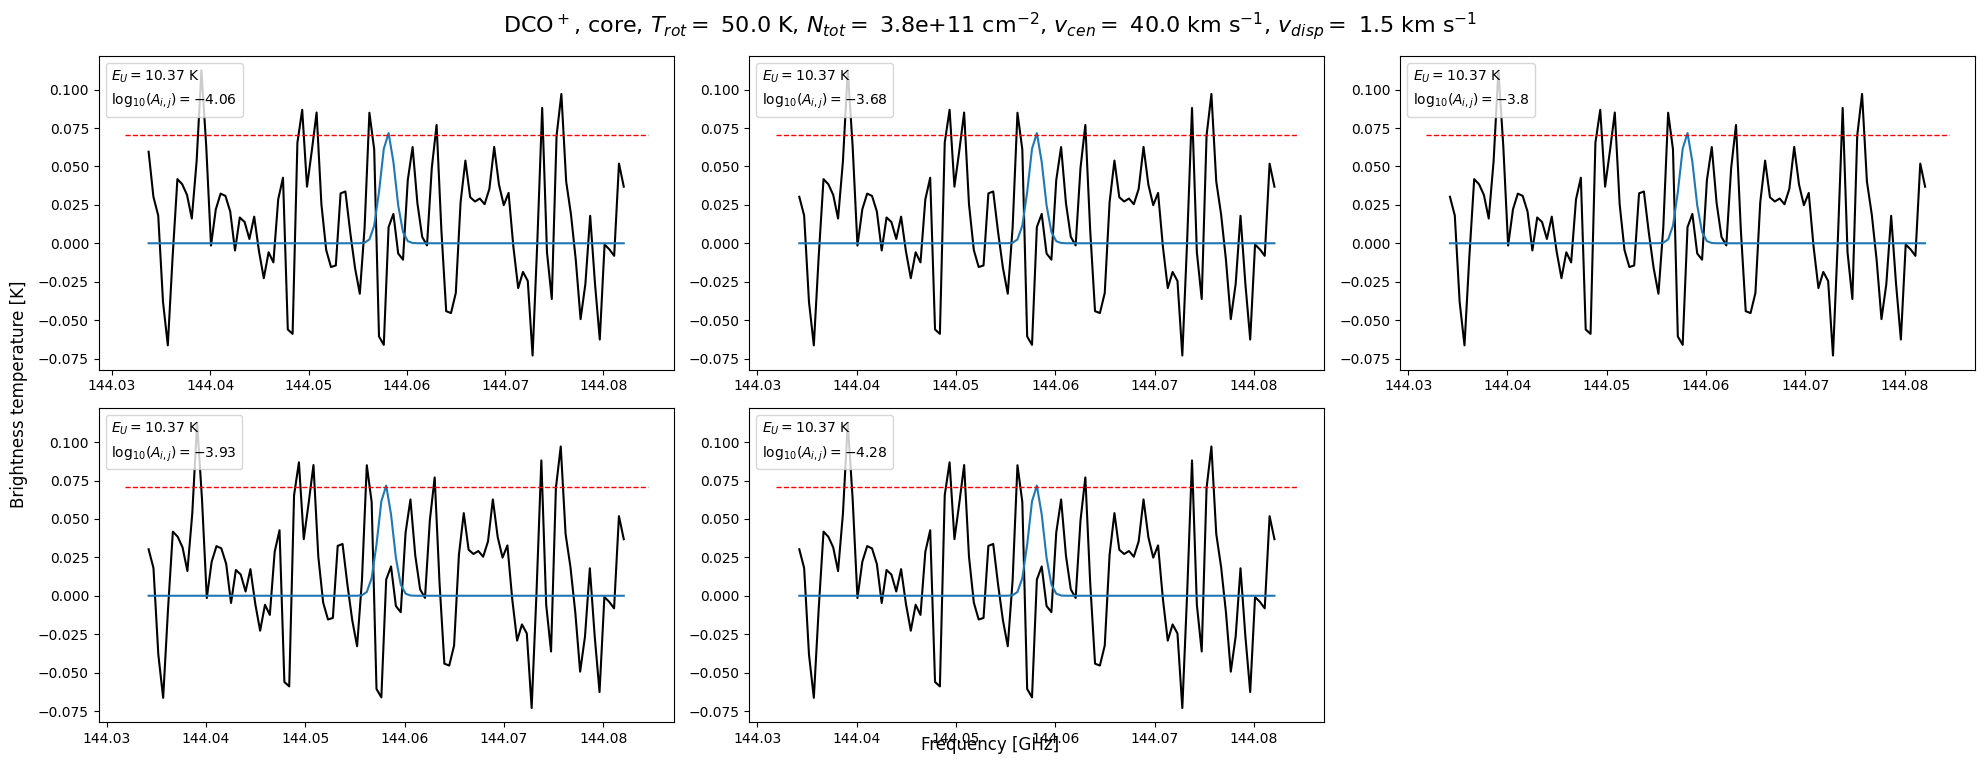

In [26]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 50., N_tot = 3.8e+11, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=8, 
               nrows=2, ncols=3, parse_loc=False, line_by_line=True, name_for_plot=f'DCO$^+$', extr_type="coord", crd=crd,
               show_2_sigma=True)

In [13]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

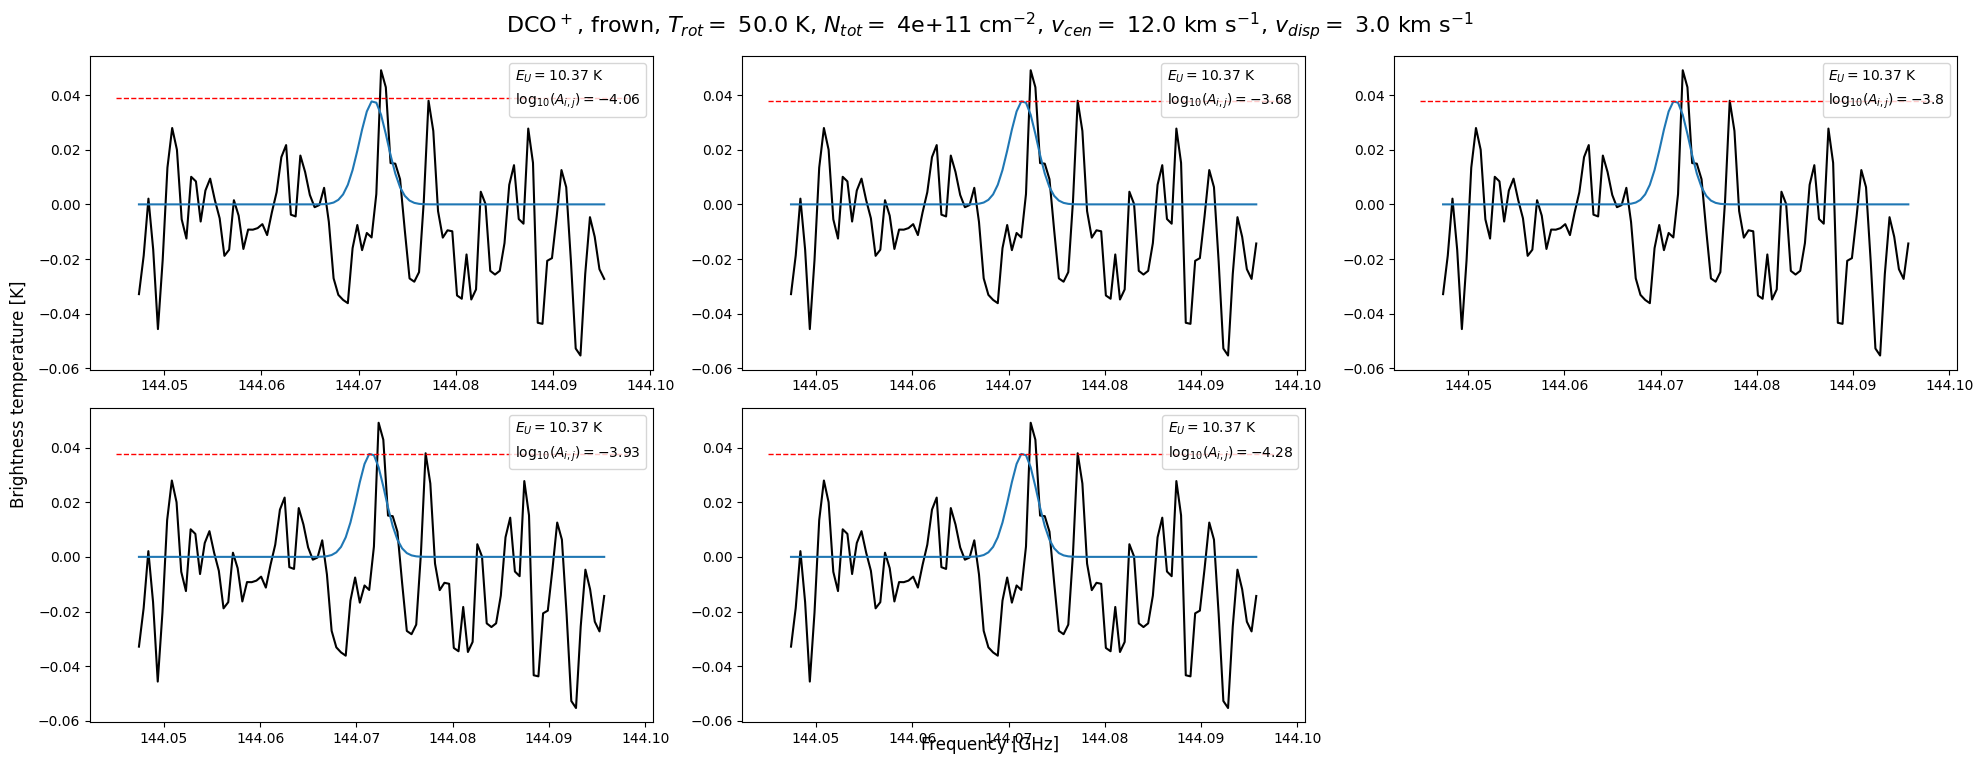

In [29]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 50., N_tot = 4.0e+11, v_cen = 12.*u.km/u.s, v_disp = 3.*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=8, 
                       nrows=2, ncols=3, parse_loc=False, line_by_line=True, name_for_plot=f'DCO$^+$', extr_type="reg", 
                       show_2_sigma=True, return_freqs=True)

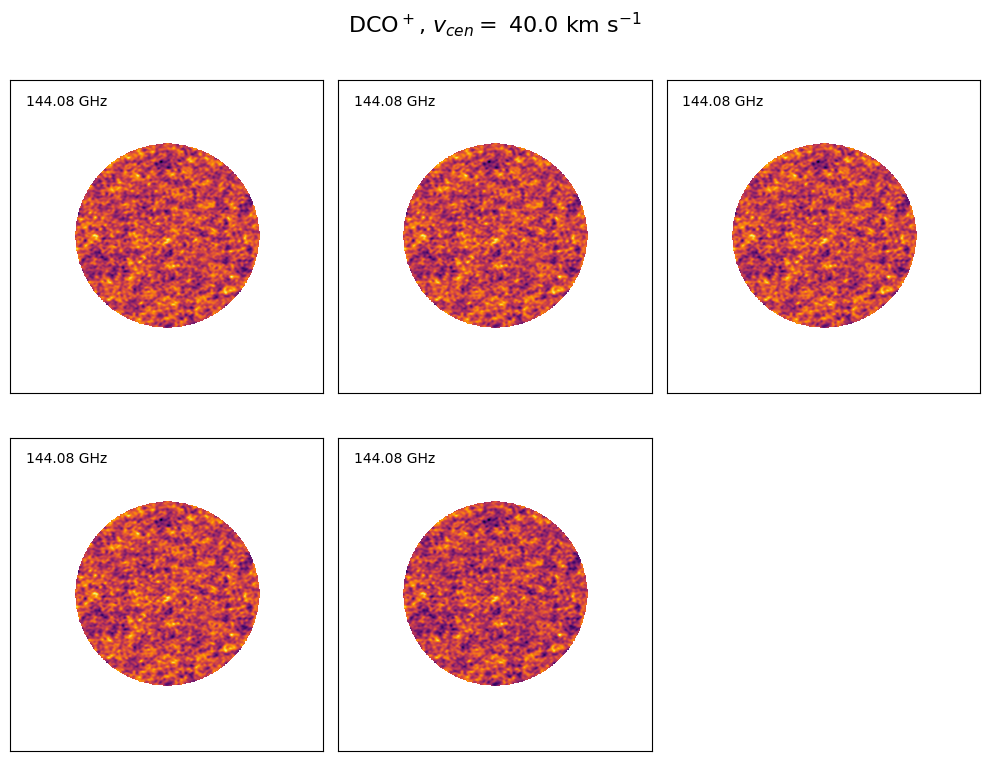

In [19]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=40*u.km/u.s, fig_width=10, fig_height=8, nrows=2, ncols=3, name_for_plot=f'DCO$^+$')

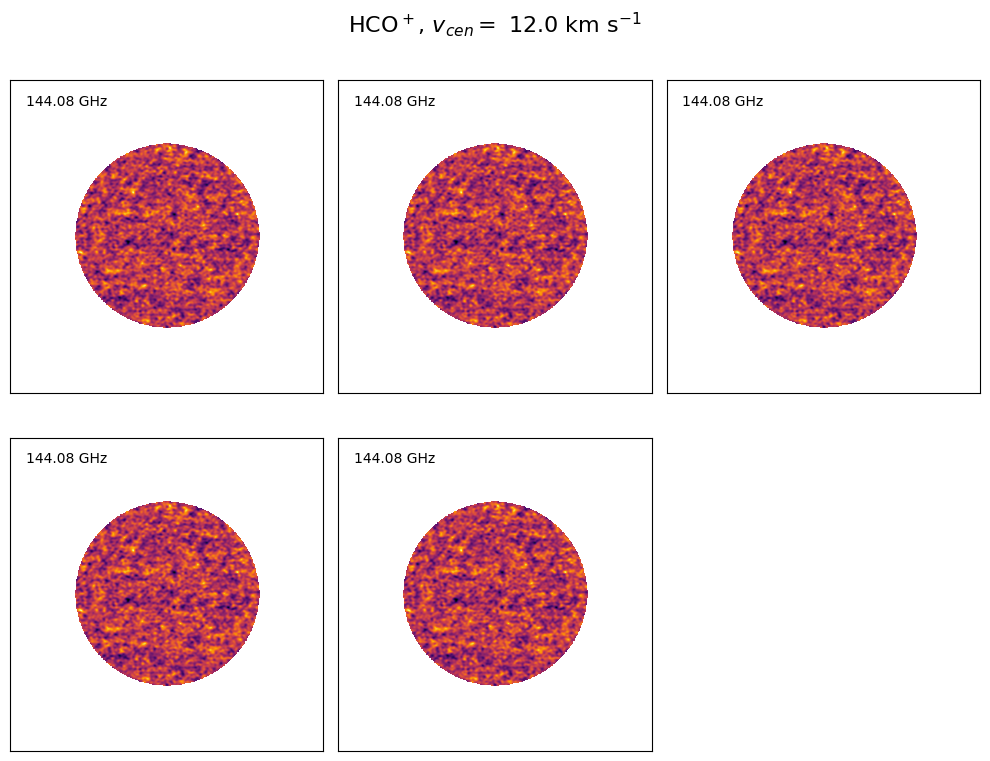

In [20]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=12*u.km/u.s, fig_width=10, fig_height=8, nrows=2, ncols=3, name_for_plot=f'HCO$^+$')